<a href="https://colab.research.google.com/github/PikalounJM/Team-Project/blob/main/Earthquake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1) 지진 데이터 불러오기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
import openpyxl

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/지진공모전/earthquake.xls') #국내지진이력 데이터
df_gb = pd.read_excel('/content/drive/MyDrive/지진공모전/df_gb.xlsx') #결합데이터
ground = pd.read_excel('/content/drive/MyDrive/지진공모전/ground.xlsx') #지하수수위변화 데이터
people = pd.read_excel('/content/drive/MyDrive/지진공모전/region_people.xlsx') #경북 인구 수 데이터
fault = pd.read_excel('/content/drive/MyDrive/지진공모전/fault.xlsx') #국내단층데이터
rainy = pd.read_csv('/content/drive/MyDrive/지진공모전/rainy.csv', encoding='cp949') #국내장마데이터
ground_built = pd.read_excel('/content/drive/MyDrive/지진공모전/지하수개발실적.xlsx') #국내지하수개발실적 데이터

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   발생시각    2051 non-null   datetime64[ns]
 1   규모      2051 non-null   float64       
 2   깊이(km)  1309 non-null   object        
 3   최대진도    578 non-null    object        
 4   위도      2051 non-null   object        
 5   경도      2051 non-null   object        
 6   위치      2051 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 112.3+ KB


In [ ]:
df.head()

,발생시각,규모,깊이(km),최대진도,위도,경도,위치
0,2025-06-13 01:57:14,2.1,18,Ⅰ,40.67 N,128.29 E,북한 양강도 풍산 남동쪽 20km 지역
1,2025-06-12 21:49:16,2.7,19,Ⅰ,35.06 N,125.08 E,전남 신안군 흑산도 북서쪽 53km 해역
2,2025-06-10 23:53:28,2.2,13,Ⅲ,38.33 N,128.58 E,강원 고성군 동남동쪽 11km 해역
3,2025-06-07 03:25:17,2.2,-,Ⅰ,39.10 N,126.76 E,북한 평안남도 양덕 남동쪽 16km 지역
4,2025-05-28 00:17:31,2.0,17,Ⅰ,35.55 N,129.65 E,울산 동구 동북동쪽 22km 해역


In [ ]:
df.isnull().sum()

,0
발생시각,0
규모,0
깊이(km),742
최대진도,1473
위도,0
경도,0
위치,0


In [ ]:
#결측치 행 추출(깊이/최대진도)
df[df['깊이(km)'].isna()]
df[df['최대진도'].isna()]

,발생시각,규모,깊이(km),최대진도,위도,경도,위치
531,2019-01-02 07:20:29,2.8,12,NaN,41.30 N,129.21 E,북한 함경북도 길주 북북서쪽 40km 지역
549,2018-11-19 03:34:49,2.1,19,NaN,36.42 N,127.30 E,대전 유성구 북서쪽 8km 지역
553,2018-10-25 05:53:46,2.3,16,NaN,35.76 N,129.19 E,경북 경주시 남남서쪽 9km 지역
579,2018-07-04 04:39:40,2.1,10,NaN,37.30 N,127.70 E,경기 여주시 동쪽 6km 지역
580,2018-07-01 15:33:22,2.2,18,NaN,37.63 N,129.48 E,강원 삼척시 북동쪽 34km 해역
...,...,...,...,...,...,...,...
2046,1995-02-05 12:59:56,2.6,NaN,NaN,39.60 N,126.00 E,북한 평안남도 개천 남동쪽 14km 지역
2047,1995-02-02 15:56:30,2.5,NaN,NaN,38.90 N,126.00 E,북한 평양 동남동쪽 26km 지역
2048,1995-01-29 17:02:58,2.4,NaN,NaN,38.90 N,126.00 E,북한 평양 동남동쪽 26km 지역
2049,1995-01-21 07:39:59,3.3,NaN,NaN,34.20 N,125.00 E,전남 신안군 가거도 북서쪽 20km 해역


In [ ]:
#데이터 count
df['규모'].value_counts().sort_values(ascending=False).head(10).reset_index()

,규모,count
0,2.1,265
1,2.2,244
2,2.4,206
3,2.5,204
4,2.3,203
5,2.0,160
6,2.6,140
7,2.7,126
8,2.9,98
9,2.8,89


In [ ]:
df['최대진도'].value_counts().reset_index()

,최대진도,count
0,Ⅰ,383
1,Ⅲ,79
2,Ⅱ,78
3,Ⅳ,28
4,Ⅴ,10


# 2) 데이터 전처리

> ## 2-1) 지진데이터 발생위치 분할



In [ ]:
#공백을 기준으로 위치 분할
import re #정규표현식 지원
df['location_split'] = df['위치'].apply(lambda x: re.split(" ", str(x))[:2]) #분할 후, 앞에 2개 요소만 가져오기

In [ ]:
df[['위치','location_split']].head(10)

,위치,location_split
0,북한 양강도 풍산 남동쪽 20km 지역,"[북한, 양강도]"
1,전남 신안군 흑산도 북서쪽 53km 해역,"[전남, 신안군]"
2,강원 고성군 동남동쪽 11km 해역,"[강원, 고성군]"
3,북한 평안남도 양덕 남동쪽 16km 지역,"[북한, 평안남도]"
4,울산 동구 동북동쪽 22km 해역,"[울산, 동구]"
5,북한 황해북도 송림 남남동쪽 13km 지역,"[북한, 황해북도]"
6,경북 김천시 동북동쪽 14km 지역,"[경북, 김천시]"
7,전남 신안군 흑산도 북서쪽 83km 해역,"[전남, 신안군]"
8,경기 연천군 북북동쪽 4km 지역,"[경기, 연천군]"
9,경기 연천군 북북동쪽 5km 지역,"[경기, 연천군]"


In [ ]:
#df['date_only'] = pd.to_datetime(df['발생시각']).dt.date #datetime은 년/월/일로만 구성
df['year'] = df['발생시각'].dt.year
df['month'] = df['발생시각'].dt.month
df['day'] = df['발생시각'].dt.day_name()

In [ ]:
#위치를 각 열로 분리
df[['행정구','지역']] = pd.DataFrame(df['location_split'].tolist(), index=df.index)
df.drop(columns='location_split', inplace=True)
df.head(5)

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,day,행정구,지역
0,2025-06-13 01:57:14,2.1,18,Ⅰ,40.67 N,128.29 E,북한 양강도 풍산 남동쪽 20km 지역,2025,6,Friday,북한,양강도
1,2025-06-12 21:49:16,2.7,19,Ⅰ,35.06 N,125.08 E,전남 신안군 흑산도 북서쪽 53km 해역,2025,6,Thursday,전남,신안군
2,2025-06-10 23:53:28,2.2,13,Ⅲ,38.33 N,128.58 E,강원 고성군 동남동쪽 11km 해역,2025,6,Tuesday,강원,고성군
3,2025-06-07 03:25:17,2.2,-,Ⅰ,39.10 N,126.76 E,북한 평안남도 양덕 남동쪽 16km 지역,2025,6,Saturday,북한,평안남도
4,2025-05-28 00:17:31,2.0,17,Ⅰ,35.55 N,129.65 E,울산 동구 동북동쪽 22km 해역,2025,5,Wednesday,울산,동구


In [ ]:
#연도별/월별 발생 이력
df['year'].value_counts().sort_index().reset_index().head(10)

,year,count
0,1995,29
1,1996,39
2,1997,21
3,1998,32
4,1999,37
5,2000,29
6,2001,41
7,2002,49
8,2003,38
9,2004,42




> ## 2-2) 행정구역별 장마 데이터 전처리



In [ ]:
#장마데이터
rainy['시작일'] = pd.to_datetime(rainy['시작일'], format='%Y.%m.%d')
rainy['year'] = rainy['시작일'].dt.year
rainy['month'] = rainy['시작일'].dt.month
#rainy.drop(columns=['start_month'], inplace=True)

In [ ]:
rainy

,행정구,지역,시작일,종료일,장마일수,강수일수,합계강수량,year,month
0,경북,울진,1995-06-30,1995.7.27,28,14,84.0,1995,6
1,경북,안동,1995-06-30,1995.7.27,28,14,147.9,1995,6
2,경북,포항,1995-06-30,1995.7.27,28,15,116.9,1995,6
3,경북,봉화,1995-06-30,1995.7.27,28,15,177.5,1995,6
4,경북,영주,1995-06-30,1995.7.27,28,16,212.5,1995,6
...,...,...,...,...,...,...,...,...,...
1586,광주,광주,2021-07-03,2021.7.19,17,9,201.8,2021,7
1587,광주,광주,2022-06-23,2022.7.25,33,17,209.6,2022,6
1588,광주,광주,2023-06-25,2023.7.26,32,25,1102.5,2023,6
1589,광주,광주,2024-06-22,2024.7.27,36,23,392.8,2024,6


In [ ]:
rainy_gb = rainy[rainy['행정구']=='경북']
rainy_gb

,행정구,지역,시작일,종료일,장마일수,강수일수,합계강수량,year,month
0,경북,울진,1995-06-30,1995.7.27,28,14,84.0,1995,6
1,경북,안동,1995-06-30,1995.7.27,28,14,147.9,1995,6
2,경북,포항,1995-06-30,1995.7.27,28,15,116.9,1995,6
3,경북,봉화,1995-06-30,1995.7.27,28,15,177.5,1995,6
4,경북,영주,1995-06-30,1995.7.27,28,16,212.5,1995,6
...,...,...,...,...,...,...,...,...,...
295,경북,문경,2024-06-22,2024.7.27,36,22,541.8,2024,6
296,경북,영덕,2024-06-22,2024.7.27,36,17,175.4,2024,6
297,경북,의성,2024-06-22,2024.7.27,36,21,342.9,2024,6
298,경북,구미,2024-06-22,2024.7.27,36,20,351.4,2024,6


In [ ]:
rainy_gb['지역'].value_counts()

,count
지역,
울진,30
안동,30
포항,30
봉화,30
영주,30
문경,30
영덕,30
의성,30
구미,30




> ## 2-3) 행정구역별 지하수 개발 실적 데이터 전처리





In [ ]:
ground_built.head()

,연도,경기,강원,충북,충남,전북,전남,경북,경남,제주
0,1995,-,65,100,96,146,57,-,190,-
1,1996,34,179,56,65,91,13,44,83,-
2,1997,110,197,124,75,106,20,115,120,-
3,1998,157,131,100,144,194,128,119,209,53
4,1999,54,90,58,56,104,85,147,112,36


In [ ]:
#연도,행정구,지하수개발실적(melt함수로 가로의 데이터를 세로로 바꾸는 형태)
gb = ground_built.melt(id_vars='연도', var_name='행정구', value_name='지하수개발실적') #id_vars:id 변수
gb['지하수개발실적'] = pd.to_numeric(gb['지하수개발실적'], errors='coerce')
gb = gb.dropna() #결측값 행 제거

In [ ]:
gb.head()

,year,행정구,지하수개발실적
1,1996,경기,34
2,1997,경기,110
3,1998,경기,157
4,1999,경기,54
5,2000,경기,199


In [ ]:
gb = gb.rename(columns={'연도':'year'})
gb['지하수개발실적'] = gb['지하수개발실적'].astype(int)
gb['행정구'].value_counts().reset_index()

,행정구,count
0,강원,30
1,전남,30
2,충북,30
3,충남,30
4,전북,30
5,경남,30
6,경기,29
7,경북,29
8,제주,25


In [ ]:
#지진이력의 연도/행정구가 동일하면 지하수개발실적 옆에 붙이기
#merge함수는 두 df를 각 데이터에 존재하는 고유값을 기준으로 병합할때 사용
df_merged = df.merge(gb[['year','행정구','지하수개발실적']], on=['year','행정구'], how='left')
df_merged['지하수개발실적'] = df_merged['지하수개발실적'].fillna(0)
df_merged['지하수개발실적'] = df_merged['지하수개발실적'].astype(int)

In [ ]:
df_merged[['year','행정구','지하수개발실적']]

,year,행정구,지하수개발실적
0,2025,북한,0
1,2025,전남,0
2,2025,강원,0
3,2025,북한,0
4,2025,울산,0
...,...,...,...
2046,1995,북한,0
2047,1995,북한,0
2048,1995,북한,0
2049,1995,전남,57




> ## 2-4) 관측소별 지하수 수위 변화 현황 데이터 전처리('25.6월 기준)



In [ ]:
ground = pd.read_excel('/content/drive/MyDrive/지진공모전/ground.xlsx')

In [ ]:
#지하수수위현황
ground.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   수위상태           115 non-null    object 
 1   충적/암반          115 non-null    object 
 2   지역특성           115 non-null    object 
 3   구경             115 non-null    int64  
 4   심도             115 non-null    int64  
 5   행정구            115 non-null    object 
 6   지역             115 non-null    object 
 7   평년수위           115 non-null    float64
 8   전년수위           115 non-null    float64
 9   현재수위           115 non-null    float64
 10  평년대비
현재수위차(m)  115 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 10.0+ KB


In [ ]:
ground

,수위상태,충적/암반,지역특성,구경,심도,행정구,지역,평년수위,전년수위,현재수위,평년대비\n현재수위차(m)
0,정상,암반,해안,350,60,경북,포항,9.42,9.01,9.25,-0.17 하강
1,정상,암반,해안,200,50,경북,포항,5.42,5.25,4.81,-0.61 하강
2,정상,암반,해안,350,45,경북,포항,37.61,37.16,37.18,-0.43 하강
3,심각,암반,해안,200,71,경북,포항,119.80,118.20,117.17,-2.63 하강
4,정상,암반,해안,200,63,경북,포항,78.90,78.81,78.65,-0.25 하강
...,...,...,...,...,...,...,...,...,...,...,...
110,정상,암반,내륙,200,60,경북,봉화,474.37,474.83,474.27,-0.10 하강
111,정상,암반,내륙,200,200,경북,봉화,70.80,70.75,70.83,0.03 상승
112,정상,암반,내륙,200,80,경북,봉화,391.85,391.54,391.54,-0.31 하강
113,심각,암반,내륙,250,60,경북,봉화,374.56,373.61,373.43,-1.13 하강


In [ ]:
ground = ground[ground['시도']=='경상북도']
ground['시도'] = ground['시도'].replace('경상북도','경북') #데이터 값 변경

In [ ]:
ground['시군구'] = ground['시군구'].replace({'포항시 북구':'포항시', '포항시 남구':'포항시'})

In [ ]:
ground['시군구'] = ground['시군구'].apply(lambda x: x[:-1] if x.endswith(('군','시')) else x)
ground.rename(columns={'시도':'행정구','시군구':'지역'}, inplace=True)

In [ ]:
df_gb = df_result.merge(ground[['행정구','지역','수위상태','충적/암반','지역특성','구경','심도','평년수위','전년수위','현재수위','평년대비\n현재수위차(m)']], on=['행정구','지역'], how='left')
df_gb

,규모,깊이(km),최대진도,경도,위치,year,month,행정구,지역,지하수개발실적,...,합계강수량,수위상태,충적/암반,지역특성,구경,심도,평년수위,전년수위,현재수위,평년대비\n현재수위차(m)
0,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,심각,암반,내륙,200.0,185.0,40.47,40.00,39.85,-0.62 하강
1,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,심각,암반,내륙,250.0,81.0,52.47,51.52,51.41,-1.06 하강
2,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,정상,암반,내륙,200.0,100.0,94.78,93.45,92.19,-2.59 하강
3,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,심각,암반,내륙,250.0,81.0,77.54,77.11,75.68,-1.86 하강
4,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,정상,암반,내륙,200.0,150.0,138.28,138.28,138.64,0.36 상승
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4432,3.0,NaN,Ⅱ,128.20 E,경북 상주시 동남동쪽 4km 지역,1995,6,경북,상주,0,...,0.0,정상,암반,내륙,250.0,62.0,284.90,284.91,285.01,0.11 상승
4433,3.0,NaN,Ⅱ,128.20 E,경북 상주시 동남동쪽 4km 지역,1995,6,경북,상주,0,...,0.0,심각,암반,내륙,350.0,50.0,85.53,85.07,84.95,-0.58 하강
4434,3.0,NaN,Ⅱ,128.20 E,경북 상주시 동남동쪽 4km 지역,1995,6,경북,상주,0,...,0.0,심각,암반,내륙,350.0,40.0,81.79,81.55,81.45,-0.34 하강
4435,3.0,NaN,Ⅱ,128.20 E,경북 상주시 동남동쪽 4km 지역,1995,6,경북,상주,0,...,0.0,정상,암반,내륙,250.0,62.0,82.34,82.36,82.50,0.16 상승


In [ ]:
ground.rename(columns={'평년대비\n현재수위차(m)':'수위상승여부'}, inplace=True)

In [ ]:
ground['수위차'] = ground['수위상승여부'].str.extract(r'([-+]?\d*\.?\d+)').astype(float) #수치만 분리
ground['수위상승여부'] = ground['수위상승여부'].str.extract(r'(상승|하강)') #문자열만 extract

In [ ]:
#결측치 행 제거
ground.dropna(subset=['수위상승여부','수위차'], inplace=True)

In [ ]:
#수위상태, 지역특성, 수위상승여부와 같은 범주형 변수는 지역별 최빈도 기준으로 평균 구하기
#심도, 평년수위, 전년수위, 현재수위, 수위차는 평균값 계산

#수치형 평균
avg = ground.groupby(['행정구','지역'], as_index=False).mean(numeric_only=True)

#범주형 최빈도 값 구하기
def get_mode(series):
  return series.mode().iloc[0] if not series.mode().empty else None

#수위상태와 지역특성, 수위상승여부의 최빈값 구하기
mode = ground.groupby(['행정구','지역'], as_index=False).agg({'수위상태':get_mode,
                                                         '지역특성':get_mode,
                                                         '수위상승여부':get_mode})

In [ ]:
df_ground = pd.merge(avg, mode, on=['행정구','지역'], how='left')
df_ground.head()

,행정구,지역,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부
0,경북,경산,200.000000,100.000000,174.102500,170.865000,170.567500,-3.535000,정상,내륙,하강
1,경북,경주,230.000000,78.600000,87.466000,86.508000,86.786000,-0.680000,정상,내륙,하강
2,경북,고령,200.000000,100.000000,33.193333,33.010000,32.696667,-0.496667,정상,내륙,하강
3,경북,구미,250.000000,83.166667,39.096667,36.603333,36.495000,-2.601667,정상,내륙,하강
4,경북,김천,216.666667,116.166667,103.835000,103.161667,102.796667,-1.038333,심각,내륙,하강


In [ ]:
df_gb = df_result.merge(df_ground[['행정구','지역','구경','심도','평년수위','전년수위','현재수위','수위차','수위상태','지역특성','수위상승여부']], on=['행정구','지역'], how='left')
depth = ['구경','심도','평년수위','전년수위','현재수위','수위차']
depth

['구경', '심도', '평년수위', '전년수위', '현재수위', '수위차']

In [ ]:
#한번에 여러 개 열의 소수점 2자리까지만 출력하기
depth = ['구경','심도','평년수위','전년수위','현재수위','수위차']
df_gb[depth] = df_gb[depth].round(2)
df_gb

,규모,깊이(km),최대진도,경도,위치,year,month,행정구,지역,지하수개발실적,...,합계강수량,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부
0,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,...,0.0,216.67,116.17,103.84,103.16,102.80,-1.04,심각,내륙,하강
1,2.5,16,Ⅲ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,...,0.0,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강
2,2.0,15,Ⅱ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,...,0.0,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강
3,2.0,13,Ⅰ,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,...,0.0,200.00,96.00,58.35,58.34,58.28,-0.07,정상,내륙,상승
4,2.5,8,Ⅳ,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,...,0.0,210.00,94.40,78.09,77.32,77.12,-0.97,정상,내륙,하강
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,NaN,Ⅱ,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,...,0.0,285.71,79.43,137.59,137.52,137.50,-0.09,정상,내륙,상승
635,2.9,NaN,Ⅱ,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,...,0.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강
636,2.2,NaN,Ⅱ,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,...,84.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강
637,2.6,NaN,Ⅱ,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,...,84.0,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강




> ## 2-5) 국내 단층 데이터 전처리



In [ ]:
fault = pd.read_excel('/content/drive/MyDrive/지진공모전/fault.xlsx')
fault['연장(km)'] = fault['연장(km)'].astype(int)
fault = fault.replace({'지역':'북면'}, '울진군')

In [ ]:
fault.head()

,이름,연장(km),행정구,지역
0,가사리 단층,64.0,강원,정선군
1,가야동 단층,17.0,강원,양양군
2,가음 단층,40.0,경북,의성군
3,광주 단층,180.0,전남,진안군
4,검성동 단층,4.0,경북,울진군


In [ ]:
fault_count = fault[['행정구','지역']].value_counts().reset_index()
fault_count = fault_count[fault_count['행정구']=='경북']
fault_count['지역'] = fault_count['지역'].apply(lambda x: x[:-1] if x.endswith(('군','시')) else x)
fault_count.rename(columns={'count':'단층수'}, inplace=True)
fault_count

,행정구,지역,단층수
2,경북,경주,5
3,경북,상주,3
4,경북,울진,3
10,경북,의성,2
11,경북,안동,2
24,경북,봉화,1
25,경북,문경,1
27,경북,영덕,1
28,경북,영천,1
29,경북,영주,1


In [ ]:
#지진이력에 단층수 붙이기
df_gb = df_gb.merge(fault_count[['행정구','지역','단층수']], on=['행정구','지역'], how='left')
df_gb

,Unnamed: 0,규모,깊이(km),최대진도,경도,위치,year,month,행정구,지역,...,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부,단층수
0,0,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,...,216.67,116.17,103.84,103.16,102.80,-1.04,심각,내륙,하강,NaN
1,1,2.5,16,Ⅲ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,...,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강,5.0
2,2,2.0,15,Ⅱ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,...,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강,5.0
3,3,2.0,13,Ⅰ,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,...,200.00,96.00,58.35,58.34,58.28,-0.07,정상,내륙,상승,1.0
4,4,2.5,8,Ⅳ,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,...,210.00,94.40,78.09,77.32,77.12,-0.97,정상,내륙,하강,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,634,2.6,NaN,Ⅱ,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,...,285.71,79.43,137.59,137.52,137.50,-0.09,정상,내륙,상승,3.0
635,635,2.9,NaN,Ⅱ,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3.0
636,636,2.2,NaN,Ⅱ,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3.0
637,637,2.6,NaN,Ⅱ,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3.0


In [ ]:
df_gb['단층수'] = df_gb['단층수'].fillna(0)
df_gb['단층수'] = df_gb['단층수'].astype(int)

In [ ]:
df_gb.drop(columns={'Unnamed: 0','경도','단층갯수'},inplace=True)

In [ ]:
df_merged = df_merged.merge(fault_count[['행정구','count']], on=['행정구'], how='left')

In [ ]:
df_merged['count'] = df_merged['count'].fillna(0)

In [ ]:
df_merged['count'] = df_merged['count'].astype(int)
df_merged = df_merged.rename(columns={'count':'단층갯수'})
df_merged

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수
0,2025-06-13 01:57:14,2.1,18,Ⅰ,40.67 N,128.29 E,북한 양강도 풍산 남동쪽 20km 지역,2025,6,북한,양강도,0,1
1,2025-06-12 21:49:16,2.7,19,Ⅰ,35.06 N,125.08 E,전남 신안군 흑산도 북서쪽 53km 해역,2025,6,전남,신안군,0,1
2,2025-06-10 23:53:28,2.2,13,Ⅲ,38.33 N,128.58 E,강원 고성군 동남동쪽 11km 해역,2025,6,강원,고성군,0,36
3,2025-06-07 03:25:17,2.2,-,Ⅰ,39.10 N,126.76 E,북한 평안남도 양덕 남동쪽 16km 지역,2025,6,북한,평안남도,0,1
4,2025-05-28 00:17:31,2.0,17,Ⅰ,35.55 N,129.65 E,울산 동구 동북동쪽 22km 해역,2025,5,울산,동구,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1995-02-05 12:59:56,2.6,NaN,NaN,39.60 N,126.00 E,북한 평안남도 개천 남동쪽 14km 지역,1995,2,북한,평안남도,0,1
2047,1995-02-02 15:56:30,2.5,NaN,NaN,38.90 N,126.00 E,북한 평양 동남동쪽 26km 지역,1995,2,북한,평양,0,1
2048,1995-01-29 17:02:58,2.4,NaN,NaN,38.90 N,126.00 E,북한 평양 동남동쪽 26km 지역,1995,1,북한,평양,0,1
2049,1995-01-21 07:39:59,3.3,NaN,NaN,34.20 N,125.00 E,전남 신안군 가거도 북서쪽 20km 해역,1995,1,전남,신안군,57,1


In [ ]:
df_merged['지역'] = df_merged['지역'].apply(lambda x: x[:-1] if x.endswith(('군','시','도')) else x)
df_merged[df_merged['지역']=='광주']

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수
1190,2014-08-02 01:32:27,2.2,14,NaN,37.40 N,127.20 E,경기 광주시 서남서쪽 5km 지역,2014,8,경기,광주,38,5




> ## 2-6) 행정구역별 인구 수 데이터 전처리



In [ ]:
people_gb = pd.read_excel('/content/drive/MyDrive/지진공모전/people.xlsx')

In [ ]:
people_gb['지역'] = people_gb['지역'].apply(lambda x: x[:-1] if x.endswith(('군','시')) else x)
people_gb.head(10)

,행정구,지역,2025
0,경북,경주,244495
1,경북,포항,490140
2,경북,영덕,32996
3,경북,울진,46012
4,경북,김천,135076
5,경북,상주,91096
6,경북,안동,153859
7,경북,문경,66382
8,경북,예천,54169
9,경북,울릉,9001


In [ ]:
#지진이력데이터에 인구수 붙이기
df_gyeong = df_gyeong.merge(people_gb[['행정구','지역','2025']], on=['행정구','지역'], how='left')
df_gyeong.rename(columns={'2025':'인구수'}, inplace=True)

In [ ]:
df_gyeong

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수,day,hour,day_week,인구수
0,2025-05-19 14:18:50,2.4,13,Ⅲ,36.18 N,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,22,19,14,Monday,135076
1,2025-05-07 23:08:53,2.5,16,Ⅲ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,23,Wednesday,244495
2,2025-05-07 19:55:07,2.0,15,Ⅱ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,19,Wednesday,244495
3,2024-11-03 12:16:44,2.0,13,Ⅰ,36.46 N,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,22,3,12,Sunday,32996
4,2024-10-23 17:56:17,2.5,8,Ⅳ,35.99 N,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,22,23,17,Wednesday,106143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1995-12-21 08:25:27,2.6,NaN,NaN,36.60 N,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,22,21,8,Thursday,91096
635,1995-10-03 14:05:56,2.9,NaN,NaN,36.90 N,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,22,3,14,Tuesday,46012
636,1995-06-24 21:49:58,2.2,NaN,NaN,37.00 N,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,22,24,21,Saturday,46012
637,1995-06-24 19:47:40,2.6,NaN,NaN,36.80 N,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,22,24,19,Saturday,46012




> ## 2-7) 깊이, 최대진도 결측값 대체하기
- ### 기존 동일 지역 내 규모/깊이/진도 데이터를 고려한 평균값 내기



In [ ]:
#수정데이터 불러오기
df_gyeong = pd.read_excel('/content/drive/MyDrive/지진공모전/df_gyeong_.xlsx')

In [ ]:
df_gyeong.drop(columns={'Unnamed: 0'}, inplace=True)
df_gyeong

,발생시각,규모,깊이(km),최대진도,위도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수,day,hour,day_week,인구수
0,2025-05-19 14:18:50,2.4,13,Ⅲ,36.18 N,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,22,19,14,Monday,135076
1,2025-05-07 23:08:53,2.5,16,Ⅲ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,23,Wednesday,244495
2,2025-05-07 19:55:07,2.0,15,Ⅱ,35.77 N,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,19,Wednesday,244495
3,2024-11-03 12:16:44,2.0,13,Ⅰ,36.46 N,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,22,3,12,Sunday,32996
4,2024-10-23 17:56:17,2.5,8,Ⅳ,35.99 N,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,22,23,17,Wednesday,106143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1995-12-21 08:25:27,2.6,NaN,Ⅱ,36.60 N,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,22,21,8,Thursday,91096
635,1995-10-03 14:05:56,2.9,NaN,Ⅱ,36.90 N,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,22,3,14,Tuesday,46012
636,1995-06-24 21:49:58,2.2,NaN,Ⅱ,37.00 N,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,22,24,21,Saturday,46012
637,1995-06-24 19:47:40,2.6,NaN,Ⅱ,36.80 N,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,22,24,19,Saturday,46012


In [ ]:
#최대진도 중 null값을 평균 범주형 값으로 변경하기
mask_null = df_gyeong['최대진도'].isnull()
df_gyeong.loc[mask_null & (df_gyeong['규모'] >= 2.0) & (df_gyeong['규모'] <= 3.9), '최대진도'] = 'Ⅱ'
df_gyeong.loc[mask_null & (df_gyeong['규모'] >= 4.0), '최대진도'] = 'Ⅴ'

In [ ]:
df_gb['깊이(km)'] = pd.to_numeric(df_gb['깊이(km)'], errors='coerce') #변환할 수 없는 데이터는 null 처리, 나머지는 숫자형 변환

In [ ]:
#규모, 지역을 조합한 '깊이' 결측값 대체하기
df_gb['깊이(km)'] = df_gb.groupby(['지역', '규모'])['깊이(km)'].transform(lambda x: x.fillna(x.mean()))
df_gb['깊이(km)'] = df_gb.groupby('지역')['깊이(km)'].transform(lambda x: x.fillna(x.mean()))
df_gb['깊이(km)'] = df_gb['깊이(km)'].fillna(df_gb['깊이(km)'].mean())

In [ ]:
df_gb[df_gb['구경'].isnull()]

,규모,깊이(km),최대진도,위치,year,month,행정구,지역,지하수개발실적,day,...,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부,단층수
15,2.6,14.000000,Ⅰ,경북 울릉군 울릉도 서북서쪽 58km 해역,2023,8,경북,울릉,102,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
27,2.6,26.000000,Ⅰ,경북 울릉군 울릉도 북쪽 71km 해역,2022,6,경북,울릉,102,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
38,2.0,26.000000,Ⅰ,경북 울릉군 울릉도 남서쪽 76km 해역,2021,6,경북,울릉,70,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
95,2.5,26.000000,Ⅰ,경북 울릉군 울릉도 남서쪽 34km 해역,2018,8,경북,울릉,103,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
109,2.6,9.000000,Ⅱ,경북 울릉군 북서쪽 88km 해역,2018,3,경북,울릉,103,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
484,2.7,14.162615,Ⅱ,경북 군위군 서쪽 8km 지역,2012,5,경북,군위,172,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
562,2.4,20.200000,Ⅱ,경북 울릉군 북북서쪽 169km 해역,2005,2,경북,울릉,84,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
574,2.1,14.162615,Ⅱ,경북 군위군 동남동쪽 12km 지역,2003,3,경북,군위,104,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
608,3.1,20.200000,Ⅱ,경북 울릉군 울릉도 북서쪽 43km 해역,1999,5,경북,울릉,147,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
610,3.0,20.200000,Ⅱ,경북 울릉군 울릉도 서쪽 62km 해역,1999,3,경북,울릉,147,28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
df_gb['깊이(km)'] = df_gb['깊이(km)'].astype(int)

In [ ]:
df_gb[['구경','심도','평년수위','전년수위','현재수위','수위차']] = df_gb[['구경','심도','평년수위','전년수위','현재수위','수위차']].fillna(-1)
df_gb

,규모,깊이(km),최대진도,위치,year,month,행정구,지역,지하수개발실적,day,...,구경,심도,평년수위,전년수위,현재수위,수위차,수위상태,지역특성,수위상승여부,단층수
0,2.4,13,Ⅲ,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,19,...,216.67,116.17,103.84,103.16,102.80,-1.04,심각,내륙,하강,0
1,2.5,16,Ⅲ,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,7,...,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강,5
2,2.0,15,Ⅱ,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,7,...,230.00,78.60,87.47,86.51,86.79,-0.68,정상,내륙,하강,5
3,2.0,13,Ⅰ,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,3,...,200.00,96.00,58.35,58.34,58.28,-0.07,정상,내륙,상승,1
4,2.5,8,Ⅳ,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,23,...,210.00,94.40,78.09,77.32,77.12,-0.97,정상,내륙,하강,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,14,Ⅱ,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,21,...,285.71,79.43,137.59,137.52,137.50,-0.09,정상,내륙,상승,3
635,2.9,14,Ⅱ,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,3,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3
636,2.2,14,Ⅱ,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,24,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3
637,2.6,14,Ⅱ,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,24,...,200.00,100.00,43.37,43.20,37.35,-6.02,심각,해안,하강,3


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/지진공모전/df_gyeong_.xlsx')

In [ ]:
df_result = df.merge(rainy_gb[['year','month','행정구','지역','장마일수','강수일수','합계강수량']], on=['year','month','행정구','지역'], how='left')

In [ ]:
df_result[['장마일수','강수일수','합계강수량']] = df_result[['장마일수','강수일수','합계강수량']].fillna(0)

In [ ]:
df_result.drop(columns={'Unnamed: 0', '발생시각','위도'}, inplace=True)

In [ ]:
df_result

,규모,깊이(km),최대진도,경도,위치,year,month,행정구,지역,지하수개발실적,단층갯수,day,hour,day_week,인구수,장마일수,강수일수,합계강수량
0,2.4,13,Ⅲ,128.26 E,경북 김천시 동북동쪽 14km 지역,2025,5,경북,김천,0,22,19,14,Monday,135076,0.0,0.0,0.0
1,2.5,16,Ⅲ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,23,Wednesday,244495,0.0,0.0,0.0
2,2.0,15,Ⅱ,129.07 E,경북 경주시 남서쪽 17km 지역,2025,5,경북,경주,0,22,7,19,Wednesday,244495,0.0,0.0,0.0
3,2.0,13,Ⅰ,129.64 E,경북 영덕군 동북동쪽 25km 해역,2024,11,경북,영덕,117,22,3,12,Sunday,32996,0.0,0.0,0.0
4,2.5,8,Ⅳ,128.35 E,경북 칠곡군 서쪽 5km 지역,2024,10,경북,칠곡,117,22,23,17,Wednesday,106143,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,NaN,Ⅱ,128.10 E,경북 상주시 북북서쪽 22km 지역,1995,12,경북,상주,0,22,21,8,Thursday,91096,0.0,0.0,0.0
635,2.9,NaN,Ⅱ,129.20 E,경북 울진군 서남서쪽 21km 지역,1995,10,경북,울진,0,22,3,14,Tuesday,46012,0.0,0.0,0.0
636,2.2,NaN,Ⅱ,129.30 E,경북 울진군 서쪽 9km 지역,1995,6,경북,울진,0,22,24,21,Saturday,46012,28.0,14.0,84.0
637,2.6,NaN,Ⅱ,129.50 E,경북 울진군 남남동쪽 23km 해역,1995,6,경북,울진,0,22,24,19,Saturday,46012,28.0,14.0,84.0




> ## 2-8) 범주형 변수를 수치화하기 & 일부 데이터 표준화
- ### Label Encoding, Dummy 변수를 통한 One-hot encoding



In [ ]:
#범주형 변수를 숫자로 변환(라벨인코딩, 원핫인코딩)
from sklearn.preprocessing import LabelEncoder

#라벨인코딩은 1차원으로 한 컬럼씩만 변환 가능, 이진분류일때
le = LabelEncoder()
df_gb['수위상승여부'] = le.fit_transform(df_gb['수위상승여부']) #1=하강, 0=상승
df_gb['수위상태'] = le.fit_transform(df_gb['수위상태']) #0=심각, 1=정상
df_gb['지역특성'] = le.fit_transform(df_gb['지역특성']) #0=해안, 1=내륙

df_gb = pd.get_dummies(df_gb, columns=['최대진도'])

In [ ]:
df_gb = pd.read_excel('/content/drive/MyDrive/지진공모전/df_gb.xlsx')

In [ ]:
df_gb.drop(columns={'Unnamed: 0'}, inplace=True)

In [ ]:
df_gb[['최대진도_Ⅰ','최대진도_Ⅱ','최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ']] = df_gb[['최대진도_Ⅰ','최대진도_Ⅱ','최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ']].astype(int)

In [ ]:
df_gb.drop(columns={'위치','현재수위','전년수위'}, inplace=True)

In [ ]:
map = df_gb[['규모','깊이(km)','지하수개발실적','month','hour','인구수','장마일수','강수일수','합계강수량','구경','심도','평년수위','전년수위','현재수위','수위차','수위상태','지역특성','수위상승여부','단층수','최대진도_Ⅰ','최대진도_Ⅱ',
             '최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ']]
map

,규모,깊이(km),지하수개발실적,month,hour,인구수,장마일수,강수일수,합계강수량,구경,...,수위차,수위상태,지역특성,수위상승여부,단층수,최대진도_Ⅰ,최대진도_Ⅱ,최대진도_Ⅲ,최대진도_Ⅳ,최대진도_Ⅴ
0,2.4,13,0,5,14,135076,0,0,0.0,216.67,...,-1.04,0,0,1,0,0,0,1,0,0
1,2.5,16,0,5,23,244495,0,0,0.0,230.00,...,-0.68,1,0,1,5,0,0,1,0,0
2,2.0,15,0,5,19,244495,0,0,0.0,230.00,...,-0.68,1,0,1,5,0,1,0,0,0
3,2.0,13,117,11,12,32996,0,0,0.0,200.00,...,-0.07,1,0,0,1,1,0,0,0,0
4,2.5,8,117,10,17,106143,0,0,0.0,210.00,...,-0.97,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,14,0,12,8,91096,0,0,0.0,285.71,...,-0.09,1,0,0,3,0,1,0,0,0
635,2.9,14,0,10,14,46012,0,0,0.0,200.00,...,-6.02,0,1,1,3,0,1,0,0,0
636,2.2,14,0,6,21,46012,28,14,84.0,200.00,...,-6.02,0,1,1,3,0,1,0,0,0
637,2.6,14,0,6,19,46012,28,14,84.0,200.00,...,-6.02,0,1,1,3,0,1,0,0,0


In [ ]:
from sklearn.preprocessing import StandardScaler

#표준화

scale_cols = ['깊이(km)', '지하수개발실적', '강수일수', '합계강수량', '구경', '심도', '수위차', '단층수', '인구수','평년수위']
scaler = StandardScaler()
df_gb[scale_cols] = scaler.fit_transform(df_gb[scale_cols])

In [ ]:
df_gb

,규모,깊이(km),year,month,행정구,지역,지하수개발실적,day,hour,day_week,...,구경,심도,평년수위,수위차,수위상태,지역특성,수위상승여부,단층수,최대진도,싱크홀수
0,2.4,-0.264562,2025,5,경북,김천,-2.679928,19,14,Monday,...,-0.273901,1.404460,0.499353,0.000888,0,0,1,-1.306600,3,0
1,2.5,0.470460,2025,5,경북,경주,-2.679928,7,23,Wednesday,...,0.049135,-0.101353,0.136739,0.262697,1,0,1,1.234232,3,0
2,2.0,0.225453,2025,5,경북,경주,-2.679928,7,19,Wednesday,...,0.049135,-0.101353,0.136739,0.262697,1,0,1,1.234232,2,0
3,2.0,-0.264562,2024,11,경북,영덕,0.316191,3,12,Sunday,...,-0.677877,0.596042,-0.508302,0.706319,1,0,0,-0.798433,1,0
4,2.5,-1.489598,2024,10,경북,칠곡,0.316191,23,17,Wednesday,...,-0.435539,0.531914,-0.071039,0.051795,1,0,1,-1.306600,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,-0.019555,1995,12,경북,상주,-2.679928,21,8,Thursday,...,1.399195,-0.068087,1.246954,0.691774,1,0,0,0.217899,2,0
635,2.9,-0.019555,1995,10,경북,울진,-2.679928,3,14,Tuesday,...,-0.677877,0.756363,-0.840126,-3.620810,0,1,1,0.217899,2,0
636,2.2,-0.019555,1995,6,경북,울진,-2.679928,24,21,Saturday,...,-0.677877,0.756363,-0.840126,-3.620810,0,1,1,0.217899,2,0
637,2.6,-0.019555,1995,6,경북,울진,-2.679928,24,19,Saturday,...,-0.677877,0.756363,-0.840126,-3.620810,0,1,1,0.217899,2,0


In [ ]:
#나눔고딕 폰트 설치
!pip install koreanize-matplotlib
import koreanize_matplotlib
import matplotlib.font_manager as fm

fe = fm.FontEntry(
    fname=r'/C:/Windows/Fonts/NanumGothic.ttf',
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

# 3) 데이터 시각화
- ## 3-1) Heatmap을 통한 변수 간 상관관계 파악

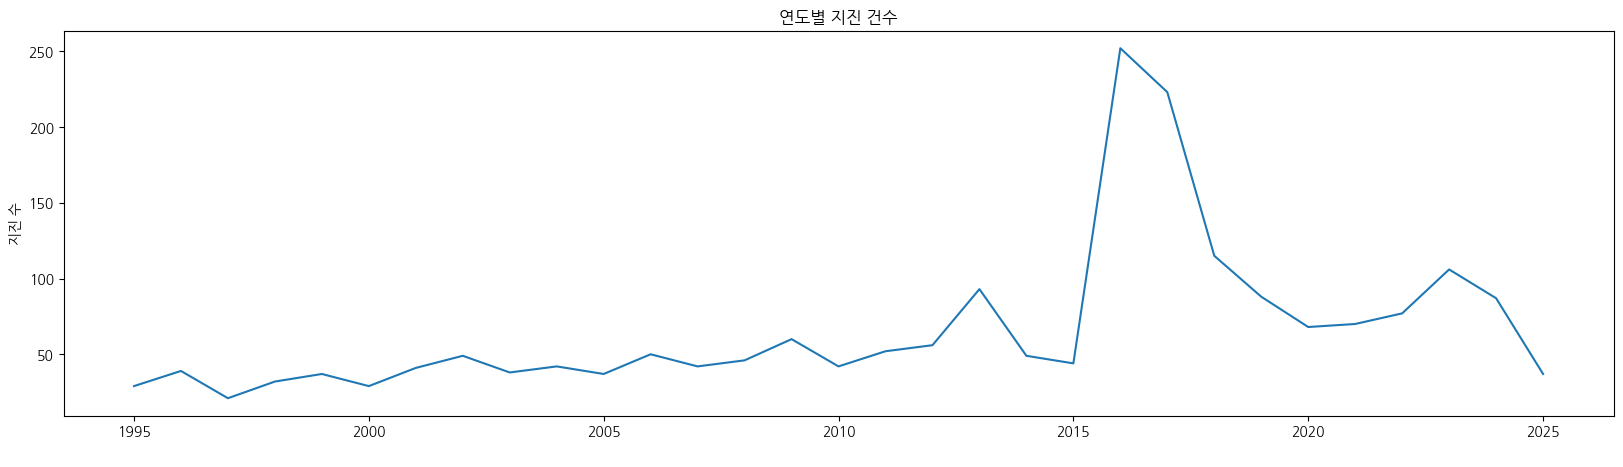

In [ ]:
#연도별 지진 건수
year_count = df['year'].value_counts().sort_index().reset_index()
plt.figure(figsize=(20,5))
plt.plot(year_count['year'],year_count['count'])
plt.title('연도별 지진 건수')
plt.xlabel(' ')
plt.ylabel('지진 수')
plt.show()

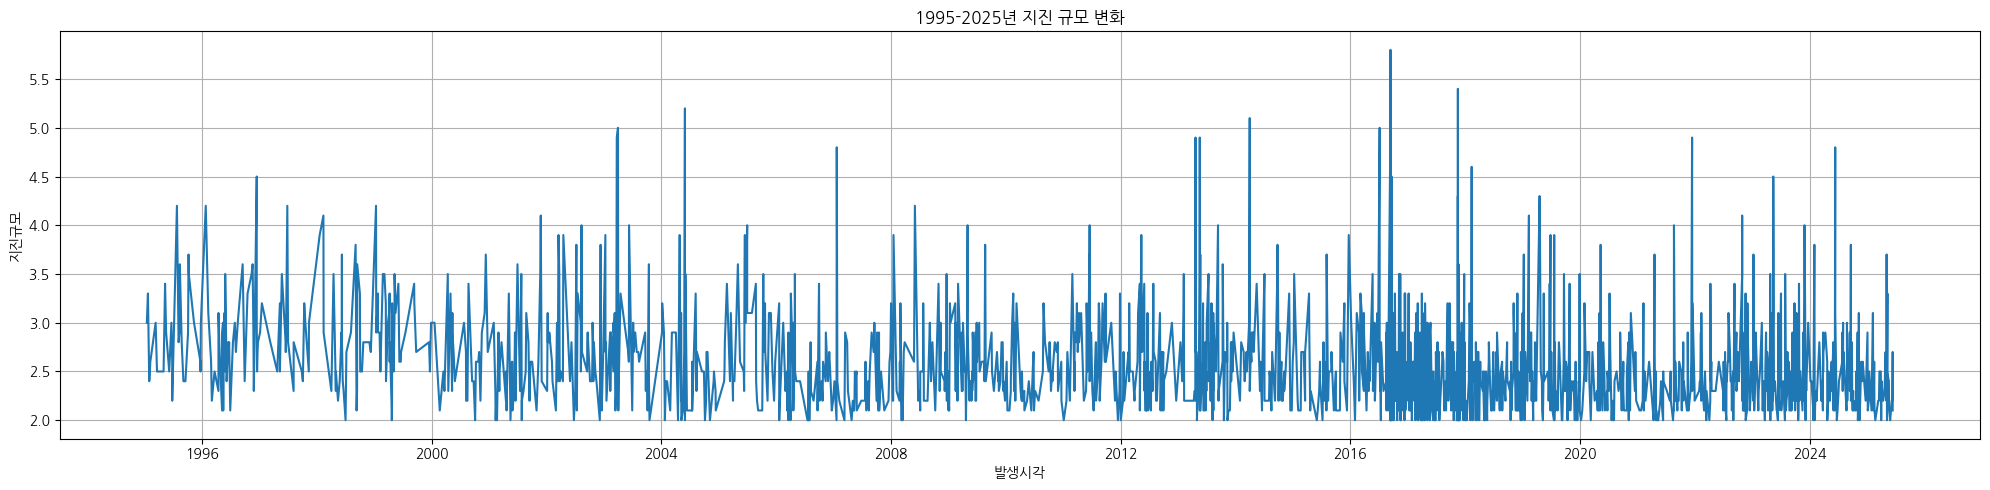

In [ ]:
#날짜별 지진 규모 추이
plt.figure(figsize=(20,5))
plt.plot(df['발생시각'], df['규모'], linestyle='-')
plt.title('1995-2025년 지진 규모 변화')
plt.xlabel('발생시각')
plt.ylabel('지진규모')
plt.grid(True)
plt.tight_layout()
plt.show()

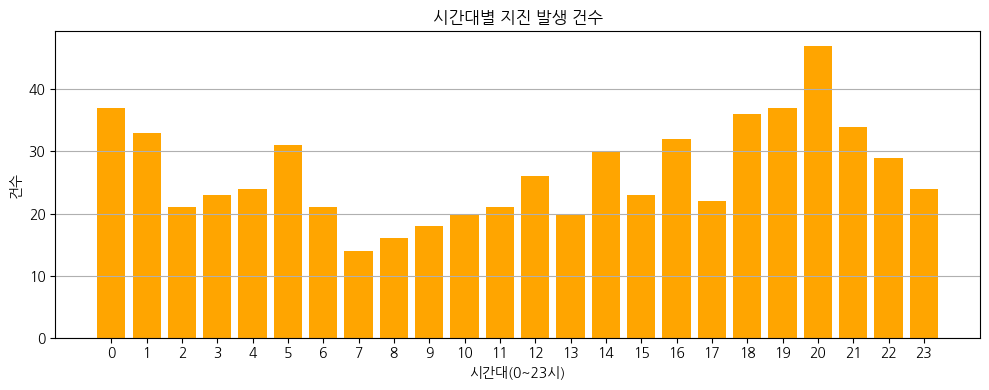

In [ ]:
#시간대별 지진 발생 추이
hour_count = df_gyeong['hour'].value_counts().sort_index()

# 시각화 (막대그래프)
plt.figure(figsize=(10, 4))
plt.bar(hour_count.index, hour_count.values, color='orange')
plt.title('시간대별 지진 발생 건수')
plt.xlabel('시간대(0~23시)')
plt.ylabel('건수')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.tight_layout()
plt.show()

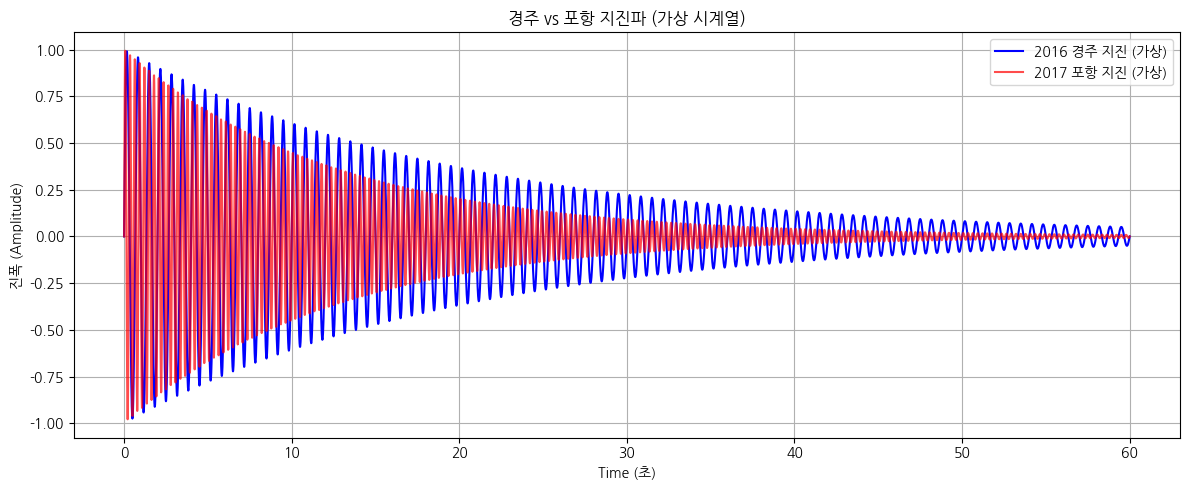

In [ ]:
# 시간축: 0~60초, 0.01초 간격
t = np.linspace(0, 60, 6000)

# 경주 지진: 낮은 진폭, 완만한 감쇠
gyeongju_wave = np.sin(2 * np.pi * 1.5 * t) * np.exp(-0.05 * t)

# 포항 지진: 높은 진폭, 빠르게 진동하고 감쇠
pohang_wave = np.sin(2 * np.pi * 3.5 * t) * np.exp(-0.08 * t)

# 시각화
plt.figure(figsize=(12, 5))
plt.plot(t, gyeongju_wave, label='2016 경주 지진 (가상)', color='blue')
plt.plot(t, pohang_wave, label='2017 포항 지진 (가상)', color='red', alpha=0.7)
plt.title('경주 vs 포항 지진파 (가상 시계열)')
plt.xlabel('Time (초)')
plt.ylabel('진폭 (Amplitude)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

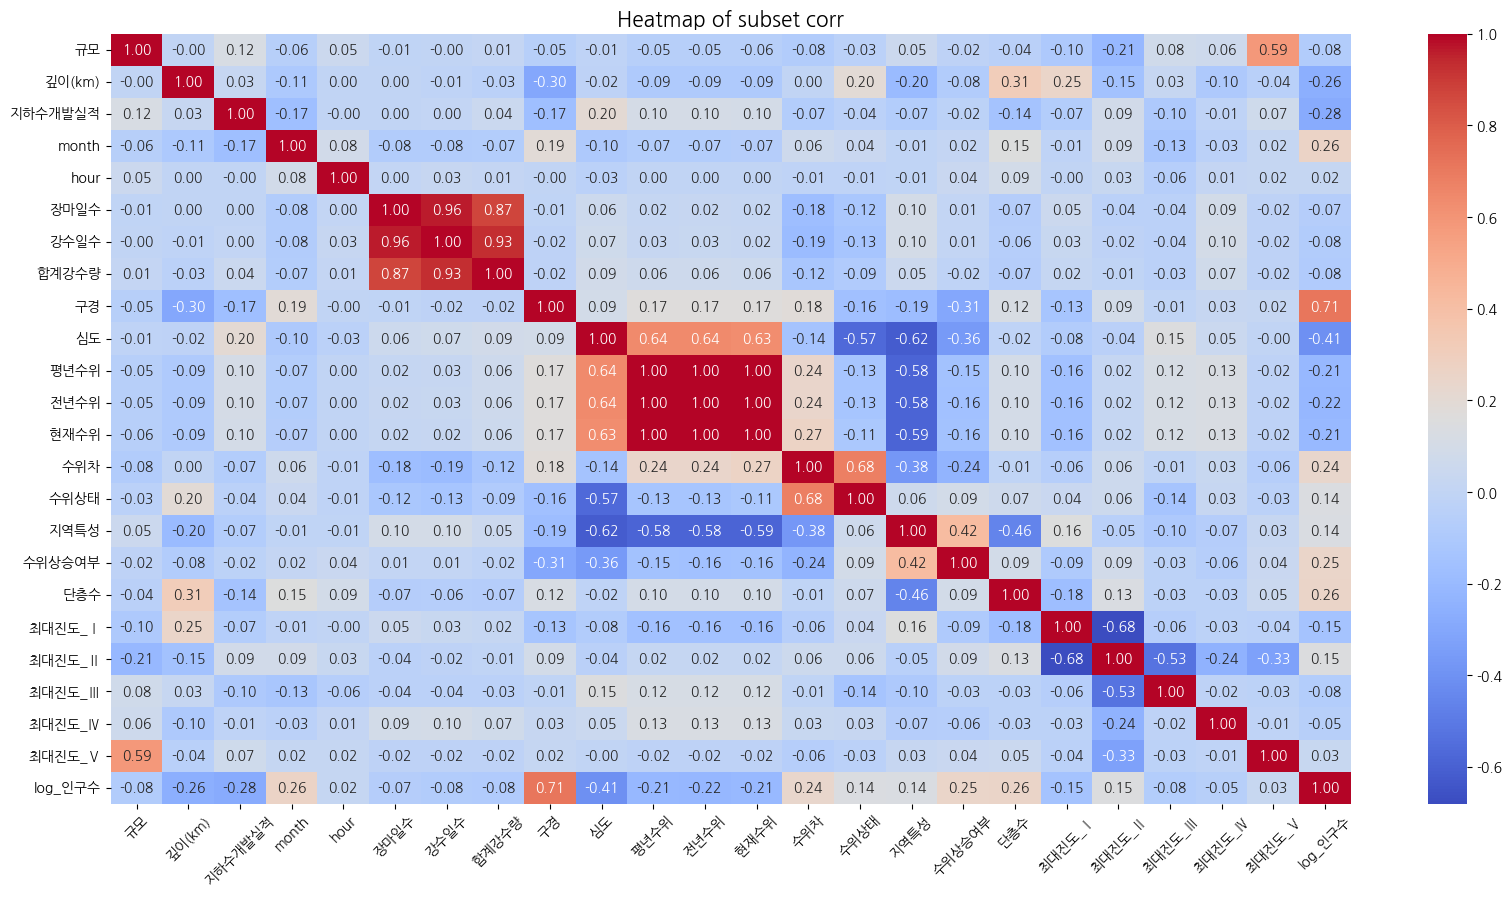

In [ ]:
#seaborn을 이용한 heatmap 상관관계 파악
map = map_dx[['규모','깊이(km)','지하수개발실적','month','hour','장마일수','강수일수','합계강수량','구경','심도','평년수위','전년수위','현재수위','수위차','수위상태','지역특성','수위상승여부','단층수','최대진도_Ⅰ','최대진도_Ⅱ',
             '최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ','log_인구수']]
corr_matrix = map.corr()

# 현재 화면의 크기를 가져오기
plt.rc('font', family='NanumGothic')
fig, ax = plt.subplots(figsize=(20, 10))  # 적절한 값을 선택

# 히트맵 그리기
sns.heatmap(data=corr_matrix, cmap='coolwarm', cbar=True, annot=True, fmt='.2f', ax=ax)
plt.title('Heatmap of subset corr', fontsize=15)
plt.xticks(rotation=45)
plt.show()

- ## 3-2) 데이터 확률분포 시각화

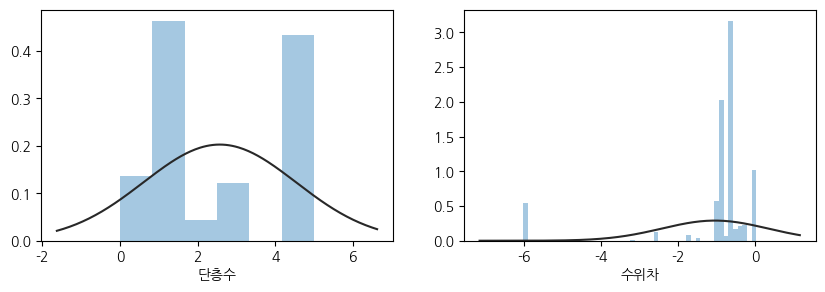

In [ ]:
#데이터 분포
import scipy as sp
import scipy.stats

f,ax=plt.subplots(1,2, figsize=(10,3))

#정규분포
before= map['단층수']
sns.distplot(before, kde=False, rug=False, fit=sp.stats.norm, ax = ax[0])

before= map['수위차']
sns.distplot(before, kde=False, rug=False, fit=sp.stats.norm, ax = ax[1])
plt.show()

# 4) OLS 회귀분석 및 다중공선성 파악

> ## 4-1) 국내 싱크홀 데이터 추가





In [ ]:
sinkhole = pd.read_excel('/content/drive/MyDrive/지진공모전/sinkhole.xlsx')
sinkhole.rename(columns={'년도':'year', '월':'month'}, inplace=True)
sinkhole.drop(columns={'합계'}, inplace=True)

In [ ]:
sinkhole = sinkhole.melt(id_vars=['year','month'], var_name='행정구', value_name='싱크홀수')
sinkhole['싱크홀수'] = pd.to_numeric(sinkhole['싱크홀수'], errors='coerce')
sinkhole=sinkhole[sinkhole['행정구']=='경북']

In [ ]:
sinkhole.head()

,year,month,행정구,싱크홀수
1176,2018,1,경북,0
1177,2018,2,경북,0
1178,2018,3,경북,1
1179,2018,4,경북,2
1180,2018,5,경북,4


In [ ]:
df_gb = df_gb.merge(sinkhole[['year','month','싱크홀수']], on=['year','month'], how='left')

In [ ]:
df_gb.drop(columns={'싱크홀수_x','싱크홀수_y'}, inplace=True)

In [ ]:
df_gb['싱크홀수'] = df_gb['싱크홀수'].fillna(0)
df_gb['싱크홀수'] = df_gb['싱크홀수'].astype(int)

In [ ]:
scale_cols = ['싱크홀수']
scaler = StandardScaler()
df_gb[scale_cols] = scaler.fit_transform(df_gb[scale_cols])
df_gb

,규모,깊이(km),year,month,행정구,지역,지하수개발실적,day,hour,day_week,...,구경,심도,평년수위,수위차,수위상태,지역특성,수위상승여부,단층수,최대진도,싱크홀수
0,2.4,-0.264562,2025,5,경북,김천,-2.679928,19,14,Monday,...,-0.273901,1.404460,103.84,0.000888,0,0,1,-1.306600,3,-0.232147
1,2.5,0.470460,2025,5,경북,경주,-2.679928,7,23,Wednesday,...,0.049135,-0.101353,87.47,0.262697,1,0,1,1.234232,3,-0.232147
2,2.0,0.225453,2025,5,경북,경주,-2.679928,7,19,Wednesday,...,0.049135,-0.101353,87.47,0.262697,1,0,1,1.234232,2,-0.232147
3,2.0,-0.264562,2024,11,경북,영덕,0.316191,3,12,Sunday,...,-0.677877,0.596042,58.35,0.706319,1,0,0,-0.798433,1,-0.232147
4,2.5,-1.489598,2024,10,경북,칠곡,0.316191,23,17,Wednesday,...,-0.435539,0.531914,78.09,0.051795,1,0,1,-1.306600,4,-0.232147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,-0.019555,1995,12,경북,상주,-2.679928,21,8,Thursday,...,1.399195,-0.068087,137.59,0.691774,1,0,0,0.217899,2,-0.232147
635,2.9,-0.019555,1995,10,경북,울진,-2.679928,3,14,Tuesday,...,-0.677877,0.756363,43.37,-3.620810,0,1,1,0.217899,2,-0.232147
636,2.2,-0.019555,1995,6,경북,울진,-2.679928,24,21,Saturday,...,-0.677877,0.756363,43.37,-3.620810,0,1,1,0.217899,2,-0.232147
637,2.6,-0.019555,1995,6,경북,울진,-2.679928,24,19,Saturday,...,-0.677877,0.756363,43.37,-3.620810,0,1,1,0.217899,2,-0.232147


In [ ]:
target = df_gb['규모']
x_data = df_gb.drop(['규모','행정구','지역','day_week','year','수위상승여부','수위상태','장마일수'], axis=1)

In [ ]:
#OLS 회귀분석

#상수항 추가
df_x_ = sm.add_constant(x_data, has_constant= "add")

#회귀모델 적합
model = sm.OLS(target, df_x_)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     규모   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     18.32
Date:                Mon, 07 Jul 2025   Prob (F-statistic):           1.60e-42
Time:                        06:55:46   Log-Likelihood:                -333.38
No. Observations:                 639   AIC:                             700.8
Df Residuals:                     622   BIC:                             776.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3506      0.095     14.175      0.000       1.163       1.538
깊이(km)         0.0553      0.020      2.765      0.006       0.016       0.095
month          0.0006      0.005      0.117      0.907      -0.010       0.011
지하수개발실적        0.0399      0.017      2.286      0.023       0.006       0.074
day            0.0008      0.002      0.360      0.719      -0.004       0.005
hour           0.0043      0.002      1.886      0.060      -0.000       0.009
인구수           -0.0857      0.042     -2.047      0.041      -0.168      -0.003
강수일수          -0.0696      0.047     -1.494      0.136      -0.161       0.022
합계강수량          0.0667      0.046      1.449      0.148      -0.024       0.157
구경             0.0532      0.032      1.667      0.096      -0.009       0.116
심도            -0.0395      0.038     -1.040      0.299      -0.114       0.035
평년수위          -0.0514      0.025     -2.032      0.043      -0.101      -0.002
수위차           -0.0104      0.032     -0.328      0.743      -0.073       0.052
지역특성           0.0798      0.095      0.841      0.401      -0.107       0.266
단층수           -0.0469      0.028     -1.657      0.098      -0.103       0.009
최대진도           0.4996      0.031     16.018      0.000       0.438       0.561
싱크홀수          -0.0053      0.021     -0.255      0.799      -0.046       0.035
==============================================================================
Omnibus:                      105.994   Durbin-Watson:                   1.750
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.710
Skew:                           1.060   Prob(JB):                     2.32e-37
Kurtosis:                       4.357   Cond. No.                         161.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#최대진도 원핫인코딩에서 라벨링 범주로 다시 원복하기
df_gb['최대진도'] = (
    df_gb['최대진도_Ⅰ'] * 1 +
    df_gb['최대진도_Ⅱ'] * 2 +
    df_gb['최대진도_Ⅲ'] * 3 +
    df_gb['최대진도_Ⅳ'] * 4 +
    df_gb['최대진도_Ⅴ'] * 5
)

In [ ]:
df_gb.drop(columns={'최대진도_Ⅰ','최대진도_Ⅱ','최대진도_Ⅲ','최대진도_Ⅳ','최대진도_Ⅴ'}, inplace=True)

In [ ]:
#다중공선성 VIF 여부 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif factor'] = [variance_inflation_factor(
    x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif = vif.sort_values("vif factor").reset_index(drop=True)
vif

,vif factor,features
0,1.141044,지하수개발실적
1,1.141463,싱크홀수
2,1.443981,깊이(km)
3,2.380959,평년수위
4,2.953298,단층수
5,3.475216,수위차
6,3.563501,hour
7,3.756384,구경
8,4.772955,day
9,5.213877,심도




> ## 4-2) hour/month/day 시계열 변수 코사인 변환



In [ ]:
#시간변수 사인/코사인 변환해서 주기성 패턴을 보존하기
# 요일 숫자 매핑
day_map = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}
df_gb['day_num'] = df_gb['day_week'].map(day_map)

In [ ]:
# ✅ 요일 사인/코사인
df_gb['day_sin'] = np.sin(2 * np.pi * df_gb['day_num'] / 7)
df_gb['day_cos'] = np.cos(2 * np.pi * df_gb['day_num'] / 7)

# ✅ 시간
df_gb['hour_sin'] = np.sin(2 * np.pi * df_gb['hour'] / 24)
df_gb['hour_cos'] = np.cos(2 * np.pi * df_gb['hour'] / 24)

# ✅ 월 (0부터 시작)
df_gb['month_sin'] = np.sin(2 * np.pi * (df_gb['month'] - 1) / 12)
df_gb['month_cos'] = np.cos(2 * np.pi * (df_gb['month'] - 1) / 12)

In [ ]:
df_gb.drop(columns={'month','hour','day','day_num'}, inplace=True)

# 5) Ridge regression 분석을 통한 지진 규모에 영향을 주는 유의미한 변수 파악

In [ ]:
#리지 회귀를 통한 진짜 유의미한 변수 파악
#!pip install mglearn
from sklearn.linear_model import RidgeCV

# 1. 데이터 준비
x = df_gb.drop(columns=['규모', '행정구', '지역', 'day_week'])
y = df_gb['규모']

# 2. Ridge 회귀 모델 학습 (교차검증 포함)
ridge = RidgeCV(cv=5)
ridge.fit(x, y)

# 3. 계수 추출 및 정렬
ridge_coef = pd.Series(ridge.coef_, index=x.columns)
ridge_coef_sorted = ridge_coef.sort_values(key=abs, ascending=False)

# 4. 결과 출력
print("🔎 Ridge 회귀 변수 영향력 순위:")
print(ridge_coef_sorted)

🔎 Ridge 회귀 변수 영향력 순위:
최대진도         0.476909
강수일수        -0.109624
수위상승여부      -0.095869
합계강수량        0.058899
hour_cos    -0.050879
깊이(km)       0.048005
day_cos      0.046637
심도          -0.044235
hour_sin    -0.037175
단층수         -0.035877
평년수위        -0.033304
지역특성         0.032860
수위차         -0.021782
month_sin   -0.017453
year        -0.015168
싱크홀수         0.014108
지하수개발실적      0.014003
인구수         -0.012996
day_sin     -0.011133
month_cos   -0.009557
장마일수         0.008838
수위상태        -0.007509
구경           0.007396
dtype: float64


# 6) 지역별 지진 위험도 추정을 위한 모델 학습

> ## 6-1) Logistic Regression



In [ ]:
df_gb = pd.read_excel('/content/drive/MyDrive/지진공모전/df_all.xlsx')

In [ ]:
df_gb

,규모,깊이(km),year,행정구,지역,지하수개발실적,day_week,인구수,장마일수,강수일수,...,수위상승여부,단층수,최대진도,싱크홀수,day_sin,day_cos,hour_sin,hour_cos,month_sin,month_cos
0,2.4,-0.264562,2025,경북,김천,-2.679928,Monday,-0.606241,0,-0.166683,...,1,-1.306600,3,-0.232147,0.000000,1.000000,-5.000000e-01,-8.660254e-01,0.866025,-5.000000e-01
1,2.5,0.470460,2025,경북,경주,-2.679928,Wednesday,0.044973,0,-0.166683,...,1,1.234232,3,-0.232147,0.974928,-0.222521,-2.588190e-01,9.659258e-01,0.866025,-5.000000e-01
2,2.0,0.225453,2025,경북,경주,-2.679928,Wednesday,0.044973,0,-0.166683,...,1,1.234232,2,-0.232147,0.974928,-0.222521,-9.659258e-01,2.588190e-01,0.866025,-5.000000e-01
3,2.0,-0.264562,2024,경북,영덕,0.316191,Sunday,-1.213776,0,-0.166683,...,0,-0.798433,1,-0.232147,-0.781831,0.623490,1.224647e-16,-1.000000e+00,-0.866025,5.000000e-01
4,2.5,-1.489598,2024,경북,칠곡,0.316191,Wednesday,-0.778437,0,-0.166683,...,1,-1.306600,4,-0.232147,0.974928,-0.222521,-9.659258e-01,-2.588190e-01,-1.000000,-1.836970e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,2.6,-0.019555,1995,경북,상주,-2.679928,Thursday,-0.867990,0,-0.166683,...,0,0.217899,2,-0.232147,0.433884,-0.900969,8.660254e-01,-5.000000e-01,-0.500000,8.660254e-01
635,2.9,-0.019555,1995,경북,울진,-2.679928,Tuesday,-1.136310,0,-0.166683,...,1,0.217899,2,-0.232147,0.781831,0.623490,-5.000000e-01,-8.660254e-01,-1.000000,-1.836970e-16
636,2.2,-0.019555,1995,경북,울진,-2.679928,Saturday,-1.136310,28,5.236006,...,1,0.217899,2,-0.232147,-0.974928,-0.222521,-7.071068e-01,7.071068e-01,0.500000,-8.660254e-01
637,2.6,-0.019555,1995,경북,울진,-2.679928,Saturday,-1.136310,28,5.236006,...,1,0.217899,2,-0.232147,-0.974928,-0.222521,-9.659258e-01,2.588190e-01,0.500000,-8.660254e-01


In [ ]:
#모델 학습(로지스틱 회귀 + 확률 기반 위험도 추정)
from sklearn.linear_model import LogisticRegression
import numpy as np

#불필요한 열 제거 및 더미 인코딩
drop_cols = ['year','행정구', 'day_week']
X = df_gb.drop(columns=drop_cols)
X = pd.get_dummies(X, columns=['지역'], drop_first=False)

In [ ]:
#의사 타겟 생성
y_fake = np.random.choice([0,1], size=len(X))

#지역별 발생 건수 계산
region_counts = df_gb['지역'].value_counts().to_dict()

#각 행에 해당 지역의 발생 건수 가중치 부여
sample_weight = df_gb['지역'].map(region_counts)

In [ ]:
#로지스틱 회귀 모델 학습
model = LogisticRegression(max_iter=1000)
model.fit(X, y_fake, sample_weight=sample_weight)

LogisticRegression(max_iter=1000)

In [ ]:
z = np.dot(X, model.coef_.flatten()) + model.intercept_[0]
z = np.array(z, dtype=np.float64)  # 명시적 변환
df_gb['risk_score'] = 1 / (1 + np.exp(-z))

In [ ]:
df_gb['risk_score_rank'] = df_gb['risk_score'].rank(pct=True)
df_gb[['risk_score','risk_score_rank']]

,risk_score,risk_score_rank
0,0.487706,0.522692
1,0.504054,0.568075
2,0.700007,0.893584
3,0.698073,0.892019
4,0.055425,0.020344
...,...,...
634,0.321700,0.150235
635,0.496945,0.541471
636,0.727903,0.915493
637,0.713738,0.906103


In [ ]:
#지역이름 복원: 더미 변수에서 추출
region_cols = [col for col in X.columns if col.startswith("지역_")]
region_df = X[region_cols].copy()
df_gb['지역'] = region_df.idxmax(axis=1).str.replace("지역_","")

#지역별 평균 위험도 계산
region_risk = df_gb.groupby('지역')[['risk_score','risk_score_rank']].mean().reset_index().sort_values(by='risk_score', ascending=False)

In [ ]:
region_risk.head(10)

,지역,risk_score,risk_score_rank
8,성주,0.763234,0.924622
6,봉화,0.762424,0.929577
17,의성,0.758160,0.902750
11,영양,0.716454,0.866197
10,영덕,0.658470,0.789530
19,청송,0.600466,0.728743
15,울릉,0.584025,0.681794
0,경주,0.510812,0.591197
14,예천,0.508313,0.545607
9,안동,0.494294,0.570129


In [ ]:
#변수별 기여도 계산
coef = model.coef_.flatten()
contributions = X * coef
contributions['지역'] = df_gb['지역'].values

In [ ]:
#지역별 평균 기여도 계산
rc = contributions.groupby('지역').mean()
rc = rc.loc[:, ~rc.columns.str.startswith("지역_")]

#지역별 주요 변수 상위 5개 추출
top = {}

for region in rc.index:
  region_contrib = rc.loc[region]
  top_vars = region_contrib.abs().sort_values(ascending=False).head(5)
  top[region] = region_contrib[top_vars.index]

In [ ]:
#지역별 위험도 점수에 가장 영향을 많이 준 상위 변수 5개
top_df = pd.DataFrame(top).T
top_df

,구경,규모,단층수,수위상승여부,수위차,인구수,지역특성,최대진도,평년수위,합계강수량
경주,NaN,-0.588625,0.435105,0.547776,NaN,NaN,NaN,-1.361800,0.580091,NaN
고령,NaN,-0.683543,-0.460617,0.547776,NaN,0.928913,NaN,-1.294551,NaN,NaN
구미,NaN,-0.643097,-0.460617,0.547776,NaN,-0.748101,NaN,-1.186672,NaN,NaN
군위,-1.362913,NaN,NaN,1.095552,NaN,0.957625,1.110233,-1.294551,NaN,NaN
김천,NaN,-0.588494,-0.460617,0.547776,NaN,NaN,NaN,-1.429400,0.688655,NaN
문경,NaN,-0.608428,NaN,0.547776,NaN,0.765282,NaN,-1.294551,0.772416,NaN
봉화,NaN,-0.577574,NaN,0.547776,NaN,0.935029,NaN,-1.553461,2.181627,NaN
상주,0.343671,-0.628853,NaN,NaN,NaN,0.654391,NaN,-1.435263,0.912482,NaN
성주,NaN,-0.562204,NaN,0.547776,NaN,0.878735,NaN,-1.186672,0.771355,NaN
안동,NaN,-0.605178,NaN,0.547776,NaN,0.372776,NaN,-1.456370,0.948029,NaN


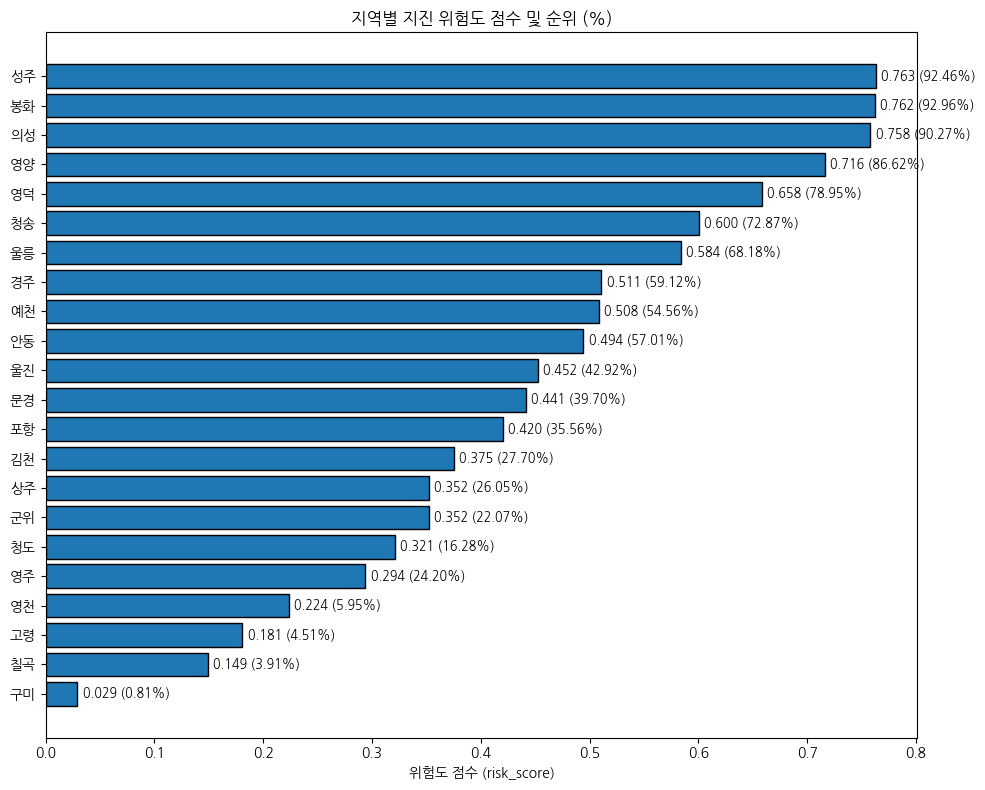

In [ ]:
# 위험도 점수가 높은 기준으로 정렬
plot_df = region_risk.sort_values(by='risk_score', ascending=True)

# 그래프 설정
plt.figure(figsize=(10, 8))
bars = plt.barh(plot_df['지역'], plot_df['risk_score'], edgecolor='black')

# 점수와 순위를 함께 텍스트로 표기
for bar, score, rank in zip(bars, plot_df['risk_score'], plot_df['risk_score_rank']):
    plt.text(score + 0.005,              # 막대 오른쪽 여백
             bar.get_y() + bar.get_height() / 2,  # 막대 세로 가운데
             f'{score:.3f} ({rank:.2%})',         # 표시: 0.715 (92.96%)
             va='center', fontsize=9)

# 축 및 제목
plt.xlabel('위험도 점수 (risk_score)')
plt.title('지역별 지진 위험도 점수 및 순위 (%)')
plt.tight_layout()
plt.show()

# 6-2) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#불필요한 열 제거 및 더미 인코딩
drop_cols = ['year','행정구', 'day_week']
X = df_gb.drop(columns=drop_cols)
X = pd.get_dummies(X, columns=['지역'], drop_first=False)

#랜덤 0/1 타겟 생성
np.random.seed(42)
y_pseduo = np.random.choice([0,1], size=len(X))

#랜덤포레스트 모델 학습
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_model.fit(X, y_pseduo)

#위험도 점수 예측
rf_risk_score = rf_model.predict_proba(X)[:, 1]

#더미지역 컬럼에서 원래 지역명 복원
region_cols = [col for col in X.columns if col.startswith("지역_")]
region_df = X[region_cols].copy()
df_gb['지역'] = region_df.idxmax(axis=1).str.replace("지역_", "")

#개별점수 할당
df_gb['risk_score'] = rf_risk_score
df_gb['risk_score_rank'] = df_gb['risk_score'].rank(pct=True)

#지역별 평균 위험도 계산
region_risk = df_gb.groupby('지역')[['risk_score','risk_score_rank']].mean().reset_index().sort_values(by='risk_score', ascending=False)

In [ ]:
region_risk.head(10)

,지역,risk_score,risk_score_rank
12,영주,0.868333,0.882368
14,예천,0.750625,0.798346
9,안동,0.609729,0.607345
8,성주,0.600500,0.539906
6,봉화,0.598600,0.621596
15,울릉,0.592583,0.618088
19,청송,0.591000,0.501826
16,울진,0.582024,0.579738
10,영덕,0.581516,0.592155
17,의성,0.561143,0.550302


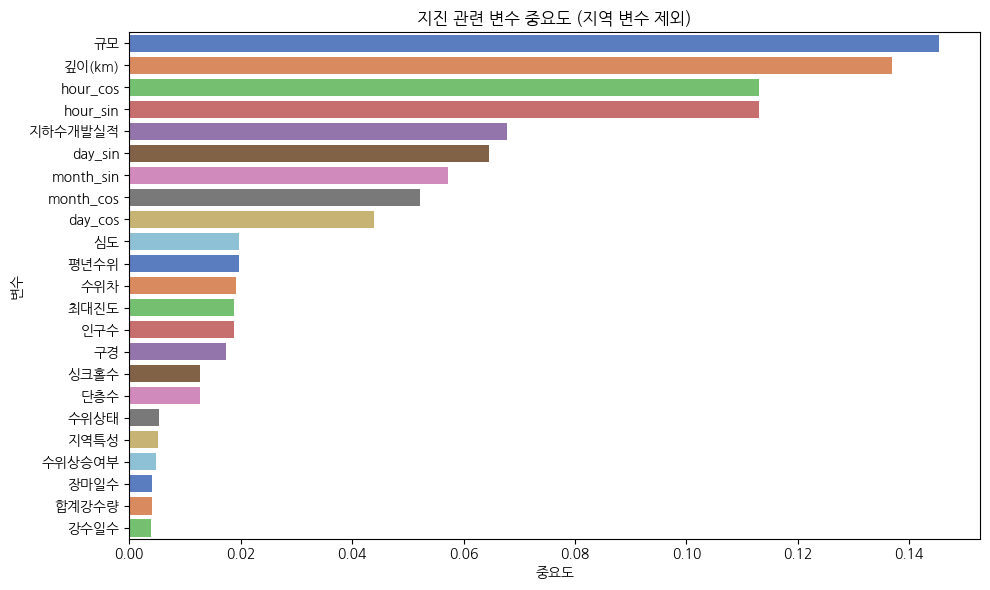

In [ ]:
# 1. 변수 중요도 추출
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# 2. DataFrame으로 정리
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importance
})

# 3. '지역_'으로 시작하는 컬럼 제외
importance_df = importance_df[~importance_df['feature'].str.startswith("지역_")]

# 4. 중요도 내림차순 정렬
importance_df = importance_df.sort_values(by='importance', ascending=False)

# 5. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='importance', y='feature', palette="muted")
plt.title("지진 관련 변수 중요도 (지역 변수 제외)")
plt.xlabel("중요도")
plt.ylabel("변수")
plt.tight_layout()
plt.show()

# 6-3) XGboost

In [ ]:
from xgboost import XGBClassifier

drop_cols = ['year','행정구','day_week']
X=df_gb.drop(columns=drop_cols)

#지역 더미 인코딩
X = pd.get_dummies(X, columns=['지역'], drop_first=False)

#Pseduo target 생성(랜덤 0/1 무작위)
np.random.seed(42)
y_pseduo = np.random.choice([0,1], size=len(X))

#XGBoost 모델 학습
xgb_model = XGBClassifier(
    n_estimators=1000,
    use_label_encoder=False, #최신 버전의 xgboost에서 경고 방지 설정
    eval_metric='logloss',
    random_state=42,
    booster='gbtree',
    max_depth = 5
)
xgb_model.fit(X, y_pseduo)

#위험도 점수 사용
xgb_risk_score = xgb_model.predict_proba(X)[:,1]

#지역 컬럼 복원
region_cols = [col for col in X.columns if col.startswith("지역_")]
region_df = X[region_cols].copy()
df_gb['지역'] = region_df.idxmax(axis=1).str.replace("지역_","")

#위험도 점수 할당
df_gb['xgb_risk_score'] = xgb_risk_score
df_gb['xgb_score_rank'] = df_gb['xgb_risk_score'].rank(pct=True)

#지역별 평균 위험도 계산
region_risk = df_gb.groupby('지역')[['xgb_risk_score','xgb_score_rank']].mean().reset_index().sort_values(by='xgb_risk_score', ascending=False)
region_risk

,지역,xgb_risk_score,xgb_score_rank
12,영주,0.996251,0.882890
14,예천,0.784284,0.722334
19,청송,0.666567,0.640063
8,성주,0.660413,0.520344
9,안동,0.625886,0.598494
6,봉화,0.600335,0.591862
16,울진,0.594580,0.552649
10,영덕,0.585006,0.553282
15,울릉,0.583615,0.552426
17,의성,0.571324,0.553096


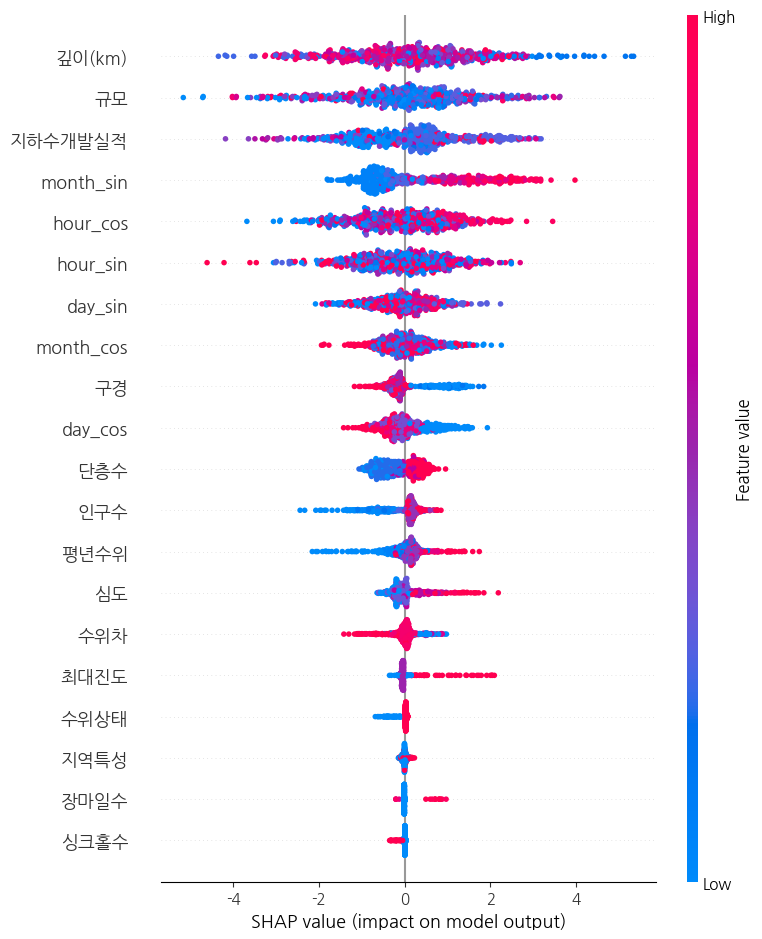

In [ ]:
import shap

# SHAP 분석
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X)

non = [col for col in X.columns if not col.startswith("지역_")]
X_region = X[non]

#모델 분류일 경우
if isinstance(shap_values, list):
  shap.summary_plot(shap_values[1][:, :len(X_region.columns)], X_region)
else:
  shap.summary_plot(shap_values[:, :len(X_region.columns)], X_region)

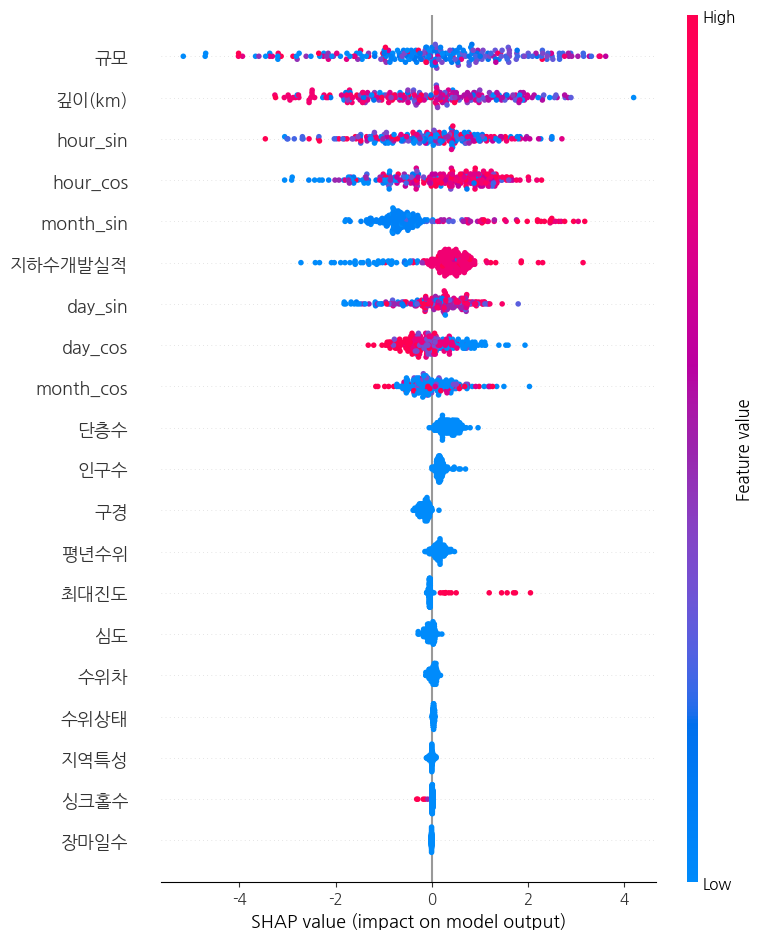

In [ ]:
# 지역 변수 제거한 컬럼 리스트
non_region_cols = [col for col in X.columns if not col.startswith("지역_")]
X_region = X[non_region_cols]

# 포항 행 추출
po = df_gb[df_gb['지역'] == '경주']
X_po = X_region.loc[po.index]

# SHAP 값도 열 수 맞춰 슬라이싱
shap_po = shap_values[1][po.index][:, :len(X_region.columns)] if isinstance(shap_values, list) else shap_values[po.index][:, :len(X_region.columns)]

# summary_plot
shap.summary_plot(shap_po, X_po)

# 6-4) LightGBM

In [ ]:
from lightgbm import LGBMClassifier

# 2. 필요 없는 열 제거
drop_cols = ['year', '행정구', 'day_week']
X = df_gb.drop(columns=drop_cols)

# 3. 지역 더미 인코딩
X = pd.get_dummies(X, columns=['지역'], drop_first=False)

# 4. Pseudo target 생성
np.random.seed(42)
y_pseudo = np.random.choice([0, 1], size=len(X))

# 5. LightGBM 모델 학습
lgbm_model = LGBMClassifier(n_estimators=500, random_state=42, verbose=-1)
lgbm_model.fit(X, y_pseudo)

# 6. 위험도 점수 예측 (class=1 확률)
lgbm_risk_score = lgbm_model.predict_proba(X)[:, 1]

# 7. 지역 컬럼 복원
region_cols = [col for col in X.columns if col.startswith("지역_")]
region_df = X[region_cols].copy()
df_gb['지역'] = region_df.idxmax(axis=1).str.replace("지역_", "")

# 8. 점수 할당
df_gb['lgbm_risk_score'] = lgbm_risk_score
df_gb['risk_score_rank'] = df_gb['lgbm_risk_score'].rank(pct=True)

# 9. 지역별 평균 위험도 계산
region_risk = (
    df_gb.groupby('지역')[['lgbm_risk_score','risk_score_rank']]
    .mean()
    .reset_index()
    .sort_values(by='lgbm_risk_score', ascending=False)
)

In [ ]:
region_risk

,지역,lgbm_risk_score,risk_score_rank
12,영주,0.999939,0.714658
14,예천,0.785668,0.635368
19,청송,0.666660,0.626500
8,성주,0.666612,0.575117
9,안동,0.624953,0.524354
6,봉화,0.599963,0.493584
16,울진,0.595203,0.501341
10,영덕,0.584870,0.526501
15,울릉,0.583308,0.578899
17,의성,0.571422,0.542365
